# Solving the Cournot model

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy import *

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import ModelProjectClass

# Model

In this project we examing the Cournot competition model which is a game model describing quantity competition in an oligopolistic market. Each firm choose the quantity to produce independently and simontaniosly if the other firms . The Nash equilibrium in a Cournot model with two completely homogeneous players is given by x1 = x2. Under Cournot competition, total market output is strictly greater than under monopoly. In a Cournot model is as a starting point in equilibrium inefficient. In a Cournot equilibrium, then N = 1 corresponds to monopoly and N $->$ $\infty$  corresponding to perfect competition.

The set up is the standard Cournot model where we work with a linear demand curve

$p_i(q_i, q_j) = 1 - aq_i - bq_j$

and costs

$c_i(q) =c_i q$

Where $q_i$ denotes firm i's output on the market

Firm i´s profit is written as:

$\pi(q_i,q_j) = (1 - aq_i - bq_j) - cq_i$ 

**Write out the model in equations here.*** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Solving the Cournot model Analytically

In [2]:
# Define variables used in this model

q1 = symbols('q1')
q2 = symbols('q2')
a = symbols('a')
b = symbols('b')
c = symbols('c')
MC = c

In [3]:
# Define the inverse demand function and the cost function 

def p(q1,q2):
    return 1-a* q1 - b* q2

def cost(q,MC):
    if q == 0:
        cost = 0 
    else:
        cost = MC*q
    return cost

In [4]:
# Define the profit function of a firm with cost level c that produces output q1 while its competitor produces q2.

def profit(q1,q2,MC):
    return p(q1,q2)*q1 - cost(q1,MC)

In [5]:
# Derive the first order condition for q1

foc1 = diff(profit(q1,q2,MC),q1)
foc1


-2*a*q1 - b*q2 - c + 1

In [6]:
# Derive the first order condition for q2

foc2 = diff(profit(q2,q1,MC),q2)
foc2

-2*a*q2 - b*q1 - c + 1

In [7]:
# In equilibrium the first order condition for both firms are equal to 0

solve([foc1, foc2], [q1, q2])

{q1: (1 - c)/(2*a + b), q2: (1 - c)/(2*a + b)}

## Solving the model Numerically for an duopol

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [8]:
# Clear previous python imports and variables

from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Define the inverse demand function and the cost function 

def p(q1,q2):
    return 1-a* q1 - b* q2

def costs(q,MC):
    return MC*q

In [10]:
# Define the profit function of a firm with cost level c that produces output $q_1$ while its competitor produces $q_2$.

def profits(demand_function,cost_function,MC,q1,q2):
    return demand_function(q1,q2)*q1-costs(q1,MC)

In [17]:
# Values for the demand parameters a, b

a = 1
b = 1
c = 1

Each firm wants to maximize its profit. However, Python does not maximization routines but only minimization routines. Hence, if we want to maximize profits, we need to minimize.

In [12]:

def reaction(q2,MC):
    q1 =  optimize.fminbound(lambda x: -profits(p,costs,MC,x,q2),0,1,full_output=1)
    return q1[0]

# Define the function -> equilibrium of q - R(q)
def fixed_point(q,c):
    return [q[0]-reaction(q[1],c[0]),q[1]-reaction(q[0],c[1])]

#Initial guess 
initial_guess = [0,0]

# Solve the model for the case where c1 = c2 = 0 and a = b = 1
optimize.fsolve(lambda q: fixed_point(q,[0,0]), initial_guess)

array([0.33333333, 0.33333333])

We start by solving our model for two firms meaning whe have a cournot duopol. For simplicity the firms in our model all have the same marginal costs and therefore each firm will produce an equal amount.

In [13]:
# Calling our model for two firms
model = ModelProjectClass(n=2)

# Setting the parameters
eq = model.EQ(12, 2, 1, 2)

# Printing the cournot equilibrium output
print(eq)

[2.49999999]


We find that in a cournot duopol each of the two firms wll poduce af quantity of 2.5 of the good when the variables is set to
a=12
b=2
c=1

# Extending the Cournot model to N firms

The standard cournot model is for oligopoistic competition, but can also be extended to include n number of firms.

## Tilføj Interaktiv figur med paramter

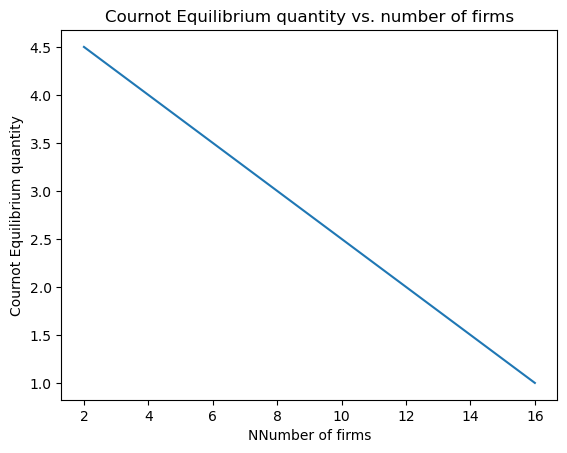

In [14]:
import matplotlib.pyplot as plt

# Define the range of n values to plot
n_values = [2, 4, 6, 8, 10, 12, 14, 16]

# Initialize lists to store EQ amounts for each n value
eq_amounts = []

# Create an instance of the MyModel class
model = ModelProjectClass(n=16)

# Call the EQ method for each n value and store the EQ amount in the list
for n in n_values:
    eq = model.EQ(20, 2, 1, n)
    eq_amounts.append(eq)

# Create the plot
plt.plot(n_values, eq_amounts)
plt.xlabel('NNumber of firms')
plt.ylabel('Cournot Equilibrium quantity')
plt.title('Cournot Equilibrium quantity vs. number of firms')
plt.show()

Each firm will try to maximize their profit, but as more firms enter the market, the total profit becomes smaller because the compition for market share becomes higher. This leads to negative relationship presented in the plot, where as more firms enter the market, their market share each becomes smaller

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Plot of the output level of firms' 1 and 2 as a function of c1

/var/folders/ct/xd1r_8d94f5bd7k32gt69gv80000gn/T/ipykernel_86386/3116457274.py:1: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  range_c = arange(0,0.51,0.01)
/var/folders/ct/xd1r_8d94f5bd7k32gt69gv80000gn/T/ipykernel_86386/3116457274.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


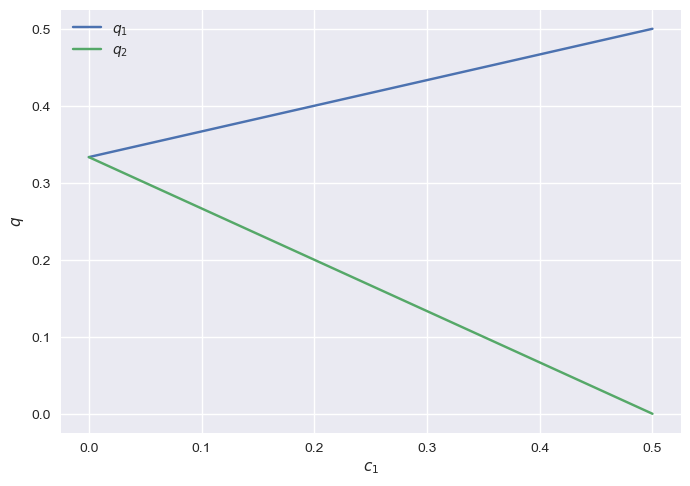

In [15]:
range_c = arange(0,0.51,0.01)
range_q = [optimize.fsolve(lambda q: fixed_point(q,[c,0]), [0,0]) for c in range_c]
plt.style.use('seaborn')
plt.clf()
plt.plot(range_c,array(range_q)[:,1], label = '$q_1$')
plt.plot(range_c,array(range_q)[:,0], label = '$q_2$')
plt.xlabel('$c_1$')
plt.ylabel('$q$')
plt.legend()
plt.savefig('Cournot.png')

# Conclusion

Add concise conclusion. 